In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
airbnb = pd.read_csv("filtered_nyc_airbnb_2019.csv")
airbnb.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


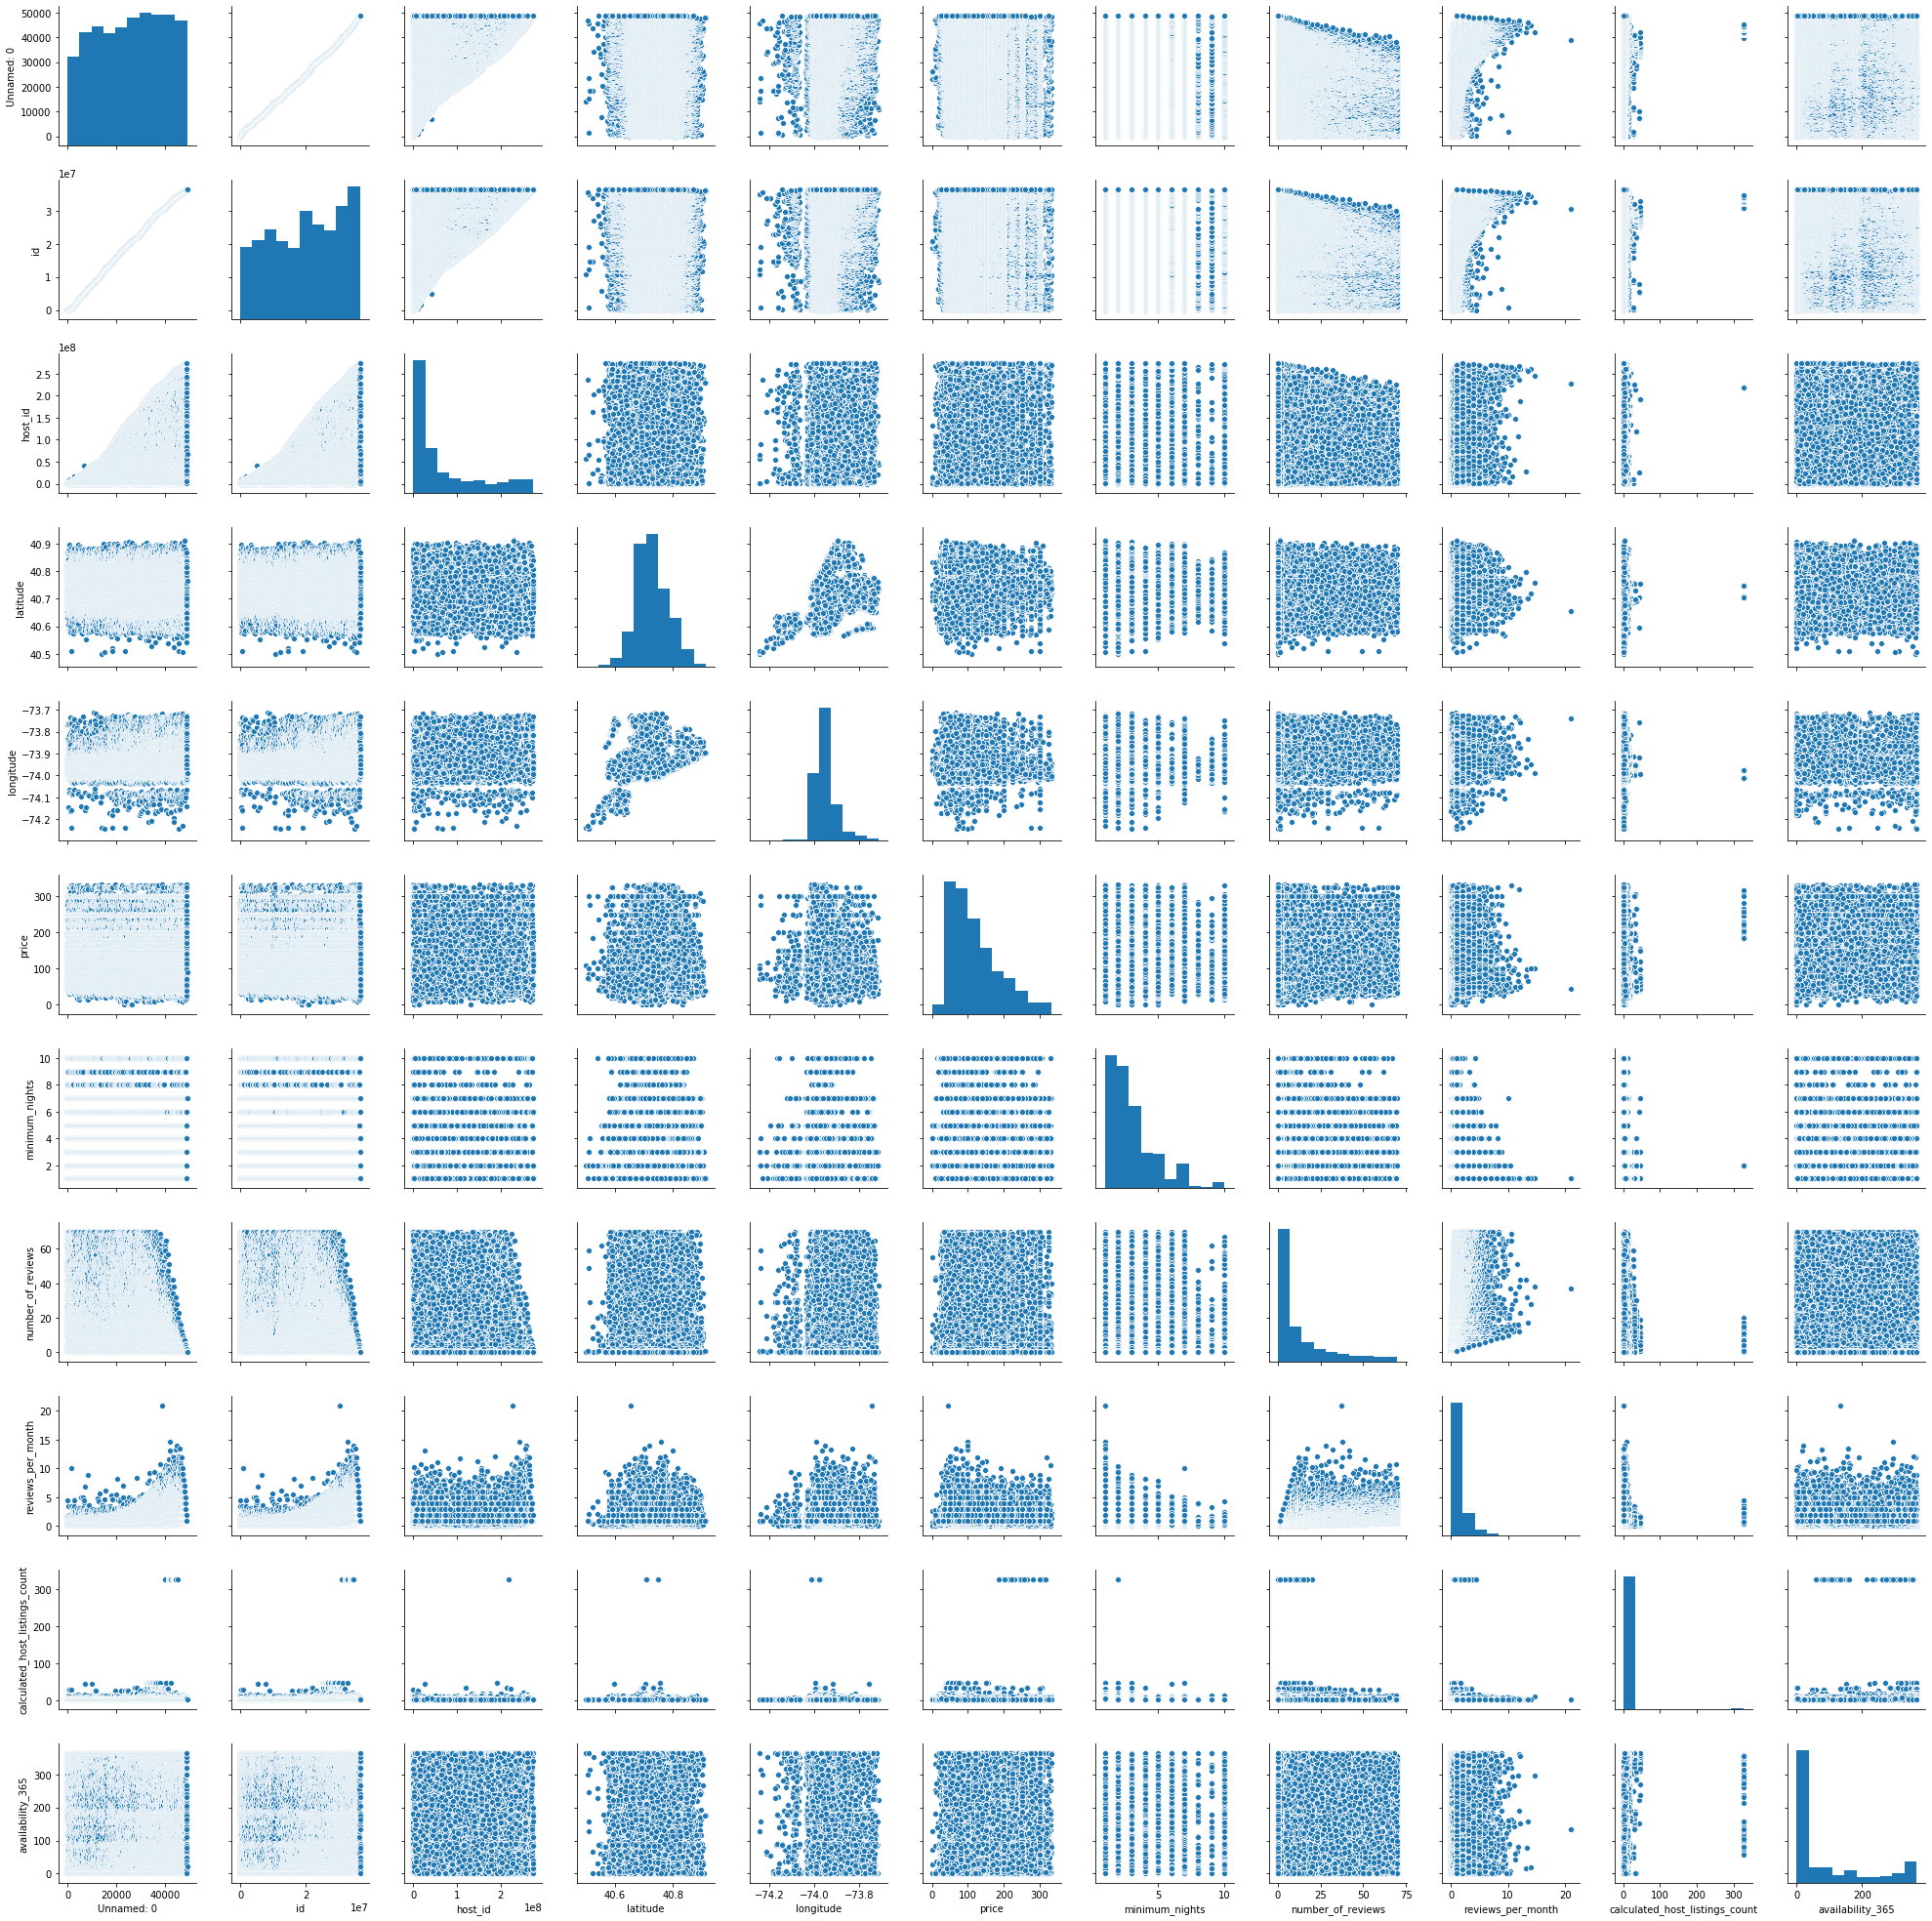

In [16]:
sns.pairplot(airbnb)
# there appears to be very little apparent correlation

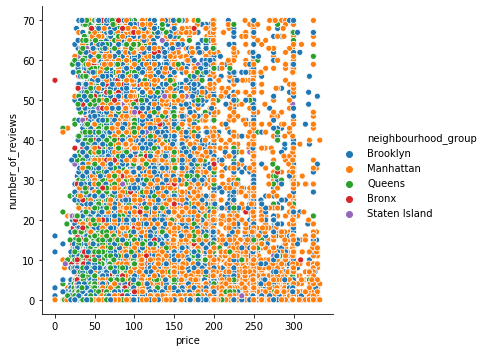

In [20]:
sns.relplot(x = "price", y = "number_of_reviews", hue = "neighbourhood_group", data = airbnb)
# there appears to be correlation between borough and price but there is a lot of noise

In [25]:
price_means_by_borough = airbnb.groupby(["neighbourhood_group"])["price"].mean()
price_means_by_borough

neighbourhood_group
Bronx             78.317621
Brooklyn         106.133586
Manhattan        144.966599
Queens            92.141488
Staten Island     91.300341
Name: price, dtype: float64

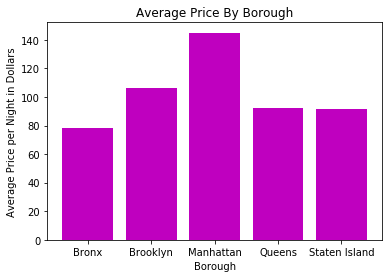

In [43]:
plt.bar(np.unique(airbnb["neighbourhood_group"]), price_means_by_borough, color = 'm')
plt.title("Average Price By Borough")
plt.xlabel("Borough")
plt.ylabel("Average Price per Night in Dollars")
plt.savefig("plots/average_price_by_borough.png")

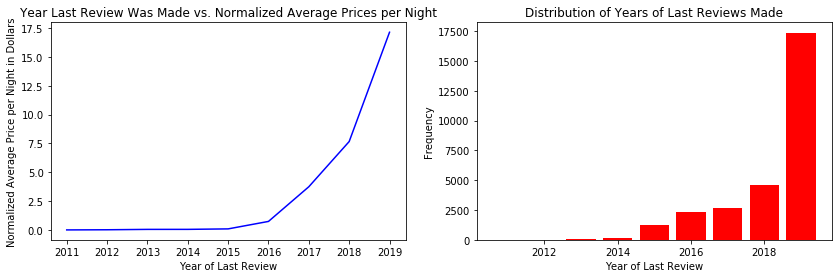

In [127]:
airbnb["last_review"] = pd.to_datetime(airbnb["last_review"])
airbnb["last_review_year"] = airbnb["last_review"].dt.year

price_means_by_last_review_year = airbnb.groupby(["last_review_year"])["price"].mean()

last_review_year_value_counts = airbnb["last_review_year"].value_counts()

fig = plt.figure(figsize = (14, 4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(price_means_by_last_review_year / last_review_year_value_counts.values, color = 'b')
ax1.set_title("Year Last Review Was Made vs. Normalized Average Prices per Night")
ax1.set_xlabel("Year of Last Review")
ax1.set_ylabel("Normalized Average Price per Night in Dollars")

ax2 = fig.add_subplot(1,2,2)
plt.bar(last_review_year_value_counts.index,
       last_review_year_value_counts.values, color = 'r')
ax2.set_title("Distribution of Years of Last Reviews Made")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Year of Last Review")

plt.savefig("plots/year_of_last_review_vs_average_price.png")

In [122]:
price_means_by_room_type = airbnb.groupby(["room_type"])["price"].mean()
price_means_by_room_type


room_type
Entire home/apt    163.342493
Private room        80.922828
Shared room         62.738612
Name: price, dtype: float64

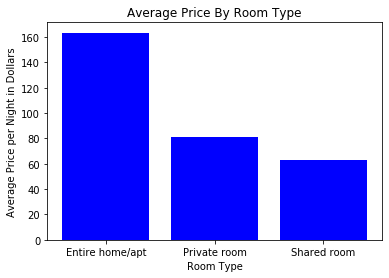

In [123]:
plt.bar(np.unique(airbnb["room_type"]), price_means_by_room_type, color = 'b')
plt.title("Average Price By Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price per Night in Dollars")
plt.savefig("plots/average_price_by_room_type.png")